# Sparse simple non-linear

This is a simple example of Shap when we have single non-linear descision function involving only three features. The output is binary and these features only have an effect when they are in a specific configuration (1, 0, 0). This means that the difference between the current prediction and the null prediction is zero, but we still want to capture the impact of these features.

This example is designed to challenge Shap to find a sparse non-linear corner case.

## Setup

In [1]:
import numpy as np
import scipy as sp
import shap
from shap import ShapExplainer, visualize
import logging
import matplotlib.pyplot as plt
% matplotlib inline
shap.initjs()

In [2]:
# set up logging
shaplog = logging.getLogger('shap')
console = logging.StreamHandler()
shaplog.handlers = [console]
shaplog.setLevel(logging.WARN)

# our prediction function
def nonlinear_3sparse(x):
    return (x[:,0] == 1) * (x[:,1] == 0) * (x[:,2] == 0).astype('float64')

## A problem with 10 features

In [3]:
nfeatures = 10
x = np.ones((1,nfeatures))
reference_data = np.zeros((1,nfeatures))

explaination = ShapExplainer(nonlinear_3sparse, reference_data, nsamples=1100).explain(x)
visualize(explaination)

## A problem with 20 features

In [33]:
nfeatures = 20
x = np.ones((1,nfeatures))
reference_data = np.zeros((1,nfeatures))

explaination = ShapExplainer(nonlinear_3sparse, reference_data, nsamples=1000).explain(x)
visualize(explaination)

## A problem with 200 features

In [35]:
nfeatures = 200
x = np.ones((1,nfeatures))
reference_data = np.zeros((1,nfeatures))

explaination = ShapExplainer(nonlinear_3sparse, reference_data, nsamples=5000).explain(x)
visualize(explaination)

In [7]:
sample_points = list(map(lambda x: np.int(np.round(x)), np.linspace(200,1000,100)))
data = np.zeros((len(sample_points),nfeatures))
for i in range(len(sample_points)):
    fnull,vals,variances = esvalues.esvalues(x, nonlinear_3sparse, reference_data, nsamples=sample_points[i])
    data[i,:] = vals

nonzero_inds [ 0  1  2  3  5  7  8 11 13]
/Users/slund1/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3 iterations, alpha=1.500e-03, previous alpha=1.500e-03, with an active set of 4 regressors.
  ConvergenceWarning)
nonzero_inds []
/Users/slund1/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=2.499e-03, previous alpha=1.418e-03, with an active set of 5 regressors.
  ConvergenceWarning)
nonzero_inds [ 1  5  8 10]
nonzero_inds [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14]
nonzero_inds [ 0  1  2  3  4  7  8 10 12 13 14]
nonzero_inds [ 0  1  2  5  6  7  9 10 11 12 13]
/Users/slund1/anaconda3/lib/python3.5/site-packages/sklearn/linear_model

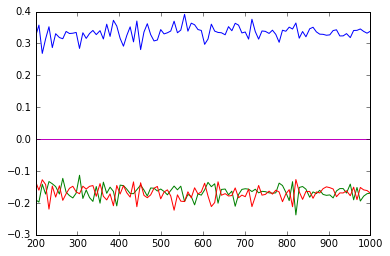

In [8]:
plt.plot(sample_points, data[:,0])
plt.plot(sample_points, data[:,1])
plt.plot(sample_points, data[:,2])
plt.plot(sample_points, data[:,3])
plt.plot(sample_points, data[:,4])

In [10]:
np.hstack((np.arange(4), np.arange(4)))

array([0, 1, 2, 3, 0, 1, 2, 3])

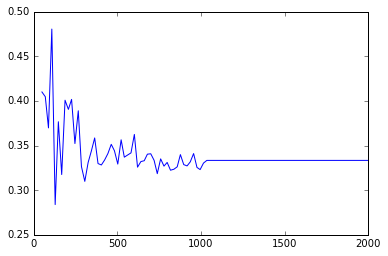

In [44]:
plt.plot(sample_points, data[:,0])

In [32]:
vals

array([  3.33333333e-01,  -1.66666667e-01,  -1.66666667e-01,  -3.81639165e-17,   3.46944695e-18,  -2.42861287e-17,  -3.12250226e-17,  -6.93889390e-18,  -3.46944695e-17,  -6.93889390e-18])